This notebook plots the top UMLS semantic types and groups that are represented in search queries from users on a web site. It takes the output from the process that queries NLM's Metamap (https://metamap.nlm.nih.gov/) which maps search queries from end-users to UMLS Semantic Terms. It also uses a lookup table to map the semantic terms to semantic groups.

*Coded by: VCid, NLM Codeathon, October 2019*

# Reading the input Metamap data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The input file is the output from the process that queries MetaMap with search terms. It should look like:

```
text_000N_50478|MMI|124.36|Medical Subject Headings|C1135584|[inpr]|["MeSH"-tx-1-"mesh"-noun-0,"MeSH Headings"-tx-1-"mesh headings"-noun-0]|TX|[523/4],[826/4],[1008/4],[1503/4],[1978/4];653/4,751/8|L01.453.245.945.700.500
text_000N_50478|MMI|100.68|GDF15 protein, human|C1431343|[aapp,bacs]|["PDF"-tx-1-"pdf"-noun-0]|TX|[29/3],[150/3],[590/3],[1087/3],[1356/3],[1560/3],[1934/3]|x.x.x.x
text_000N_50478|MMI|79.67|Penicillin G|C0030827|[antb,orch]|["penicillin"-tx-1-"penicillin"-noun-0]|TX|[461/10],[570/10],[772/10],[1309/10]|D02.065.589.099.750.750;D02.886.108.750.750;D03.633.100.300.750.750
text_000N_50478|MMI|69.61|Yellow color|C0221205|[qlco]|["YELLOW"-tx-1-"yellow"-adj-0]|TX|[12/6],[37/6],[547/6],[624/6],[877/6],[1169/6],[1251/6],[1329/6],[1449/6],[1543/6],[1733/6],[1917/6]|
text_000N_50478|MMI|58.09|Homo sapiens|C0086418|[humn]|["Human"-tx-1-"human"-noun-0]|TX|[415/5],[859/5]|B01.050.150.900.649.313.988.400.112.400.400
text_000N_50478|MMI|51.41|Hippocratic Oath|C0019565|[rnlw]|["Hippocratic Oath"-tx-1-"hippocratic oath"-noun-0]|TX|[61/16],[390/16]|K01.752.566.479.068.400;K01.752.566.479.171.132.750.551;N05.350.213.400;N05.350.340.162.500.500
```

In [2]:
input_file = 'data/input_data.txt' # Change this filename to something else if needed

The output files are CSV files that contain the number of times Semantic types and semantic groups were seen in the input data.

In [3]:
PToutput_file = 'data/preferred_term_counts_output.txt'  # preferred termscounts
SToutput_file = 'data/semantic_type_counts_output.txt'   # Semantic types counts
SGoutput_file = 'data/semantic_group_counts_output.txt'  # Semantic groups counts

Charts are saved in PNG format for future use

In [4]:
PTchart_file = 'data/UMLS_PrefTerm_Counts.png'  # bar chart of UMLS Preferred term counts
STchart_abbr_file = 'data/UMLS_SemType_abbr_Counts.png'  # Bar chart with all Semantic Types counts (ST abbreviations)
STchart_TopN_abbr_file = 'data/UMLS_SemType_TopN_abbr_Counts.png'  # Bar chart with Top 'N' Semantic Types counts (ST abbreviations)
STchart_file = 'data/UMLS_SemType_Counts.png'  # Bar chart with all Semantic Types counts (full ST names)
STchart_TopN_file = 'data/UMLS_SemType_TopN_Counts.png'  # Bar chart with Top 'N' Semantic Types counts (full ST names)
SGchart_file = 'data/UMLS_SemGroup_counts.png'  # Bar chart of all semantig group counts

The following are lookup tables used to translate UMLS Semantic Terms into readable text and for mapping them to UMLS Semantic groups

In [5]:
rec_count = 0  # number of records read
terms_count = 0  # number of UMLS terms found in the records
# retrieving the query information (future use), UMLS Semantic Type, UMLS Preferred Term
data_df = pd.DataFrame(columns=['query', 'UMLS_ST', 'UMLS_PT'])
with open(input_file) as fp:
    for line in fp:
        rec_count += 1
        elems = line.rstrip().split('|')
        query = elems[6]  # query data
        pt = elems[3]  # UMLS preferred term
        ST_string = elems[5]  # list of UMLS semantic types
        ST_string = ST_string.replace("[", "")
        ST_string = ST_string.replace("]", "")
        ST_list = ST_string.split(",")
        for elem in ST_list:
            terms_count += 1
            data_df.loc[len(data_df)] = [query, elem, pt]
print('Records read: {}'.format(rec_count))
print('Terms found: {}'.format(terms_count))


Records read: 73
Terms found: 82


In [6]:
data_df.head()

,query,UMLS_ST,UMLS_PT
0,"[""PubMed""-tx-1-""pubmed""-noun-0]",inpr,PubMed
1,"[""NLM""-tx-1-""nlm""-noun-0,""National Library of ...",hcro,National Library of Medicine (U.S.)
2,"[""MEDLINE""-tx-1-""medline""-noun-0]",inpr,MEDLINE
3,"[""NIH""-tx-1-""nih""-noun-0]",hcro,United States National Institutes of Health
4,"[""MeSH""-tx-1-""mesh""-noun-0,""MeSH Headings""-tx-...",inpr,Medical Subject Headings


Notice that each dataframe record has the query used as input to Metamap (not used in this code) and the abreviation of the UMLS Semantic Type that Metamap associated to that query. There is one record per UMLS semantic query--if Metamap associated more than one UMLS ST to the same query, then there will be multiple records for the same query.

# Counting frequency of UMLS Preferred Terms

In [7]:
PT_sum = data_df.groupby('UMLS_PT').count()
PT_sum.drop(["query"], axis = 1, inplace = True)
PT_sum.rename(columns={"UMLS_ST": "count"}, inplace=True)

In [8]:
PT_sum = PT_sum.sort_values('count', ascending=False)

In [9]:
PT_sum

,count
UMLS_PT,
Recombinant Insulin,3
Penicillin G,2
Tryptophanase,2
Journal,2
"GDF15 protein, human",2
...,...
Medicine,1
National Center for Biotechnology Information,1
National Center for Health Statistics (U.S.),1


# Plotting UMLS Prefered Term counts

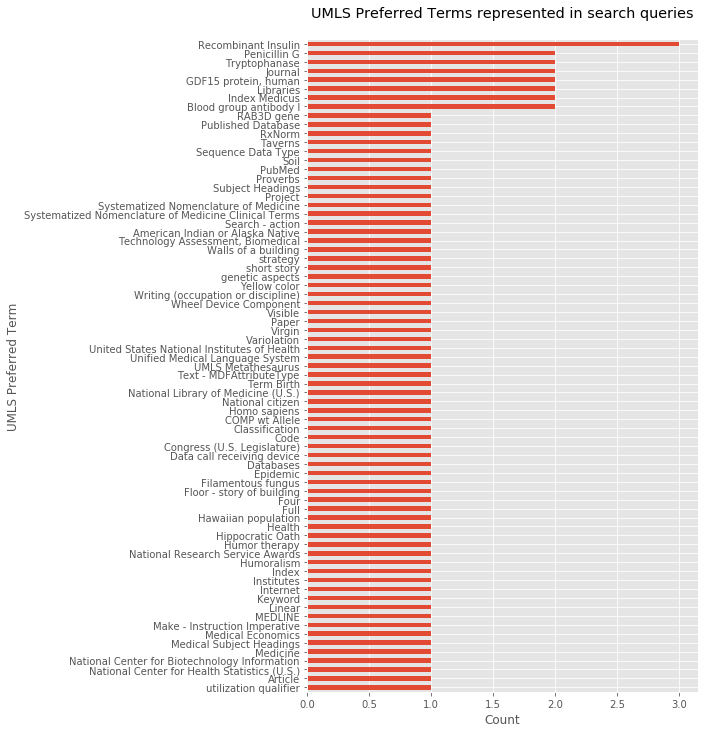

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,12))
PT_sum.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('UMLS Preferred Term')
ax.invert_yaxis()
ax.set(title='UMLS Preferred Terms represented in search queries\n');
PT_sum.rename(columns={"query": "count"}, inplace=True)

saving chart to PNG file

In [13]:
fig.savefig(PTchart_file, bbox_inches='tight')

In [14]:
print('Chart with UMLS Preferred Terms counts was saved in "{}"'.format(PTchart_file))

Chart with UMLS Preferred Terms counts was saved in "data/UMLS_PrefTerm_Counts.png"


# Saving Preferred Terms data

In [15]:
PT_sum.to_csv(PToutput_file)

In [16]:
print('Preferred Term frequency counts written to file "{}"'.format(PToutput_file))

Preferred Term frequency counts written to file "data/preferred_term_counts_output.txt"


The output format is:
```
UMLS_PT,count
<UMLS Preferred Term>, <count>
<UMLS Preferred Term>, <count>
...
```

# Counting UMLS Semantic Type frequencies

In [17]:
summary = data_df.groupby('UMLS_ST').count()

Renaming the query column to what it has become: counts

In [18]:
summary.rename(columns={"query": "count"}, inplace=True)

Sorting by counts in descending order

In [19]:
sum_sorted = summary.sort_values('count', ascending=False)

Now the dataframe has the number of times each abreviation was seen in the data

In [20]:
sum_sorted.iloc[:10]

,count,UMLS_PT
UMLS_ST,,
inpr,20,20
mnob,8,8
aapp,4,4
orgt,4,4
ftcn,3,3
qlco,3,3
popg,3,3
hcro,3,3
idcn,3,3


# Plotting UMLS Semantic Type counts

In [21]:
plt.style.use('ggplot')

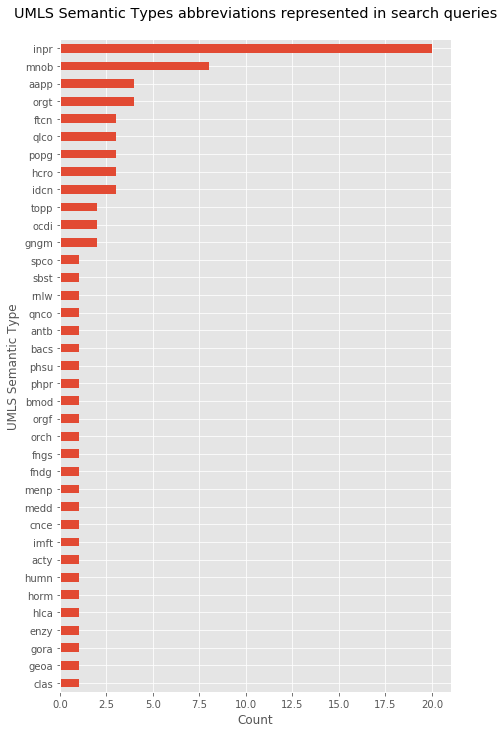

In [29]:
fig, ax = plt.subplots(figsize=(7,12))
sum_sorted.plot(y='count', kind='barh', legend = False, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('UMLS Semantic Type')
ax.invert_yaxis()
ax.set(title='UMLS Semantic Types abbreviations represented in search queries\n');

Saving chart in a PNG file

In [30]:
fig.savefig(STchart_abbr_file, bbox_inches='tight')

In [31]:
print('Chart with UMLS Semantic Type abbreviations counts was saved in "{}"'.format(STchart_abbr_file))

Chart with UMLS Semantic Type abbreviations counts was saved in "data/UMLS_SemType_abbr_Counts.png"


Plotting only the top 5

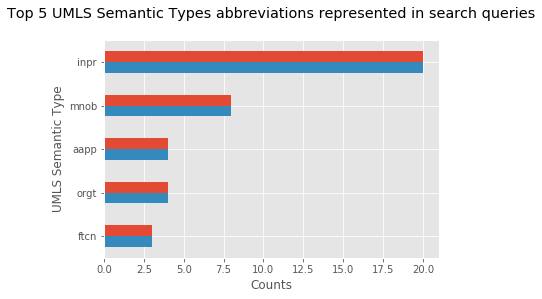

In [32]:
top_n = 5  # change this number to whaever is convenient

p = sum_sorted.iloc[:top_n].plot(kind='barh', legend = False);
p.invert_yaxis()
p.set(ylabel='UMLS Semantic Type')
p.set(xlabel='Counts')
p.set(title='Top {} UMLS Semantic Types abbreviations represented in search queries\n'.format(top_n));

Saving chart in a PNG file

In [33]:
p.figure.savefig(STchart_TopN_abbr_file, bbox_inches='tight')

In [34]:
print('Chart with Top {} UMLS Semantic Type abbreviation counts was saved in "{}"'.format(top_n, STchart_TopN_abbr_file))

Chart with Top 5 UMLS Semantic Type abbreviation counts was saved in "data/UMLS_SemType_TopN_abbr_Counts.png"


# Mapping UMLS ST Abreviations to UMLS ST Names

In [35]:
lookup_table = 'data/umls_semantic_types.csv'

In [36]:
mycolumns=['index', 'TUI', 'abbr', 'name']
maptable_df = pd.read_csv(lookup_table, index_col=0, names=mycolumns)

In [37]:
maptable_df.head()

,TUI,abbr,name
index,,,
aapp,T116,aapp,"Amino Acid, Peptide, or Protein"
acab,T020,acab,Acquired Abnormality
acty,T052,acty,Activity
aggp,T100,aggp,Age Group
amas,T087,amas,Amino Acid Sequence


In [38]:
maptable_df.loc['acty', 'name']

'Activity'

In [39]:
for index, row in sum_sorted.iterrows():
    #print(index, row[0])
    sum_sorted.loc[index, 'name'] = maptable_df.loc[index, 'name']

In [40]:
sum_sorted.head()

,count,UMLS_PT,name
UMLS_ST,,,
inpr,20,20,Intellectual Product
mnob,8,8,Manufactured Object
aapp,4,4,"Amino Acid, Peptide, or Protein"
orgt,4,4,Organization
ftcn,3,3,Functional Concept


In [41]:
sum_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, inpr to clas
Data columns (total 3 columns):
count      37 non-null int64
UMLS_PT    37 non-null int64
name       37 non-null object
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


# Saving UMLS Semantic Type frequency table

The outout will be a simple CSV file that can be used for additional post-processing.

In [42]:
sum_sorted.to_csv(SToutput_file)

In [43]:
print('Semantic Type frequency counts written to file "{}"'.format(SToutput_file))

Semantic Type frequency counts written to file "data/semantic_type_counts_output.txt"


The output format is:
```
UMLS_ST,count,name
<UMLS semantic type abbreviation>, <count>, <UMLS semantic type name>
<UMLS semantic type abbreviation>, <count>, <UMLS semantic type name>
...
```

# Plotting UMLS Semantic Types frequencies, in descending order

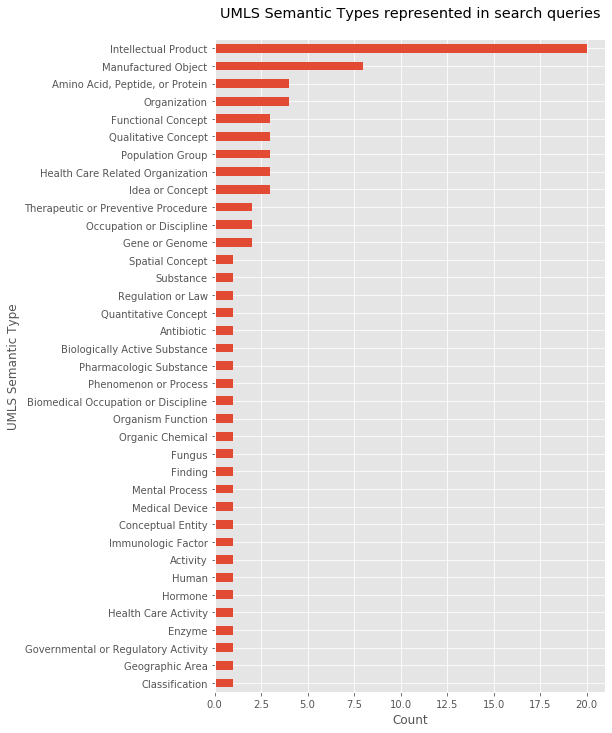

In [44]:
fig, ax = plt.subplots(figsize=(7,12))
sum_sorted.plot(kind='barh', x='name', y='count', legend = False, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('UMLS Semantic Type')
ax.invert_yaxis()
ax.set(title='UMLS Semantic Types represented in search queries\n');

Saving charty in a PNG file

In [45]:
fig.savefig(STchart_file, bbox_inches='tight')

In [46]:
print('Chart with UMLS Semantic Types counts was saved in "{}"'.format(STchart_file))

Chart with UMLS Semantic Types counts was saved in "data/UMLS_SemType_Counts.png"


**Note:** a single query can match multiple semantic types, therefore this chart can show more rows than queries.

Plotting only the top ones only

<Figure size 648x792 with 0 Axes>

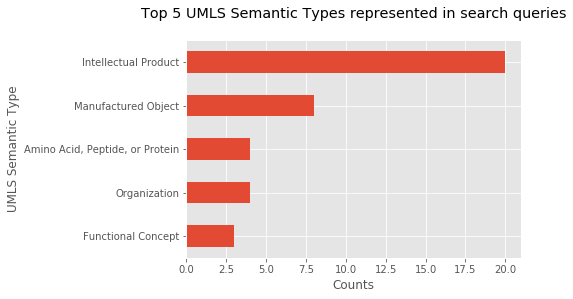

In [47]:
top_n = 5   # change this to the number you need

fig = plt.figure(figsize=(9, 11))
fig = sum_sorted.iloc[:top_n].plot(kind='barh', x='name', y='count', legend = False);
fig.invert_yaxis()
fig.set(ylabel='UMLS Semantic Type')
fig.set(xlabel='Counts')
fig.set(title='Top {} UMLS Semantic Types represented in search queries\n'.format(top_n));

In [48]:
fig.figure.savefig(STchart_TopN_file, bbox_inches='tight')

In [49]:
print('Chart with Top {} UMLS Semantic Type counts was saved in "{}"'.format(top_n, STchart_TopN_file))

Chart with Top 5 UMLS Semantic Type counts was saved in "data/UMLS_SemType_TopN_Counts.png"


# Mapping UMLS Semantic Types to Groups

Reading table that maps UMLS semantic types to semantic groups

In [50]:
st2grp_mapping_file = 'data/UMLS_type_group_mapping.txt'

In [51]:
st2grp_mapping_df = pd.read_csv(st2grp_mapping_file, sep='\t')

In [52]:
st2grp_mapping_df.head(10)

,CustomTreeNumber,BranchPosition,SemanticType,UniqueID,SemanticGroupCode,SemanticGroup,SemanticGroupAbr,Definition,Examples,RelationName,SemTypeTreeNo,UsageNote,Abbreviation,NonHumanFlag,RecordType,TUI
0,0,0.0,Unassigned,2000,20,Unassigned,Unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,Website-Specific,2001,21,Website-Specific,Website-Specific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,Bibliographic Entity,2002,22,Bibliographic Entity,Bibliographic Entity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T301
3,0,0.0,Foreign unresolved,2003,23,Foreign unresolved,Foreign unresolved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.0,Numeric ID,2004,24,Numeric ID,Numeric ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T302
5,1,1.0,Entity,1071,10,Objects,OBJC,A broad type for grouping physical and concept...,"Gifts, Financial; Image; Product Part",{inverse_isa} Physical Object; {inverse_isa} C...,A,Few concepts will be assigned to this broad type.,enty,NaN,STY,T071
6,11,2.0,Physical Object,1072,10,Objects,OBJC,An object perceptible to the sense of vision o...,Printed Media; Meteors; Physical object,{isa} Entity; {inverse_isa} Organism; {inverse...,A1,NaN,phob,NaN,STY,T072
7,111,3.0,Organism,1001,9,Living Beings,LIVE,"Generally, a living individual, including all ...",Organism; Infectious agent; Heterotroph,{isa} Physical Object; {inverse_isa} Virus; {i...,A1.1,NaN,orgm,NaN,STY,T001
8,1111,4.0,Archaeon,1194,9,Living Beings,LIVE,"A member of one of the three domains of life, ...",Thermoproteales; Haloferax volcanii; Methanosp...,{isa} Organism,A1.1.1,NaN,arch,NaN,STY,T194
9,1112,4.0,Bacterium,1007,9,Living Beings,LIVE,"A small, typically one-celled, prokaryotic mic...",Acetobacter; Bacillus cereus; Cytophaga,{isa} Organism,A1.1.2,NaN,bact,NaN,STY,T007


Doing the mapping by looking up the semantic types in the table to get their corresponding semantic group

In [53]:
for index, row in sum_sorted.iterrows():
    sum_sorted.loc[index, 'group'] = st2grp_mapping_df[st2grp_mapping_df['SemanticType'].str.contains(row['name'])].iloc[0]['SemanticGroup']

In [54]:
sum_sorted.head()

,count,UMLS_PT,name,group
UMLS_ST,,,,
inpr,20,20,Intellectual Product,Concepts and Ideas
mnob,8,8,Manufactured Object,Objects
aapp,4,4,"Amino Acid, Peptide, or Protein",Chemicals and Drugs
orgt,4,4,Organization,Organizations
ftcn,3,3,Functional Concept,Concepts and Ideas


# Plotting Semantic Groups counts 

In [55]:
groups = sum_sorted.groupby('group')['count'].sum()

In [56]:
groups = groups.sort_values(ascending=False)

In [57]:
groups

group
Concepts and Ideas               34
Chemicals and Drugs              11
Objects                           9
Organizations                     7
Living Beings                     5
Procedures                        3
Occupations                       3
Physiology                        2
Genes and Molecular Sequences     2
Activities and Behaviors          2
Phenomena                         1
Geographic Areas                  1
Disorders                         1
Devices                           1
Name: count, dtype: int64

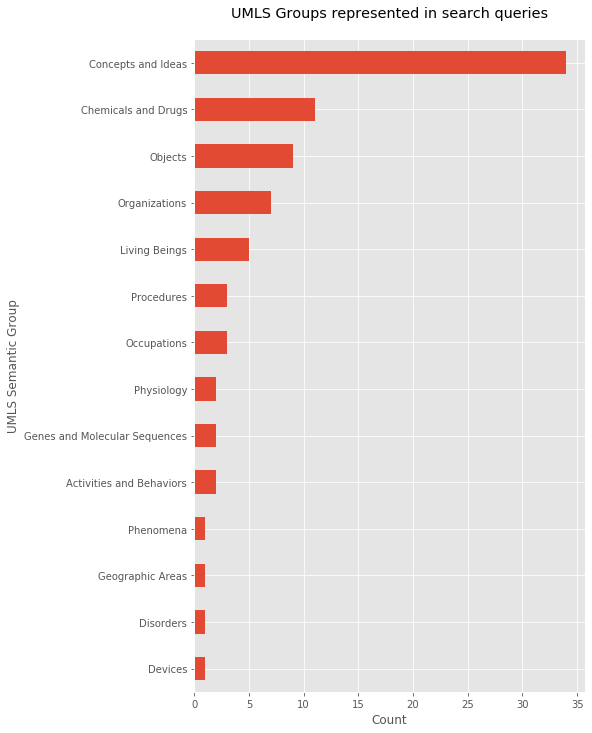

In [58]:
fig, ax = plt.subplots(figsize=(7,12))
groups.plot(kind='barh', x='name', y='count', legend = False, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('UMLS Semantic Group')
ax.invert_yaxis()
ax.set(title='UMLS Groups represented in search queries\n');

In [59]:
ax.figure.savefig(SGchart_file, bbox_inches='tight')

In [60]:
print('Semantic Group frequency counts chart written to file "{}"'.format(SGchart_file))

Semantic Group frequency counts chart written to file "data/UMLS_SemGroup_counts.png"


# Saving UMLS Semantic Group frequency table to file

The output will be a simple CSV file that can be used for additional post-processing.

In [61]:
groups.to_frame().to_csv(SGoutput_file)

In [62]:
print('Semantic Group frequency counts written to file "{}"'.format(SGoutput_file))

Semantic Group frequency counts written to file "data/semantic_group_counts_output.txt"


The output format is:
```
group, count
<UMLS group name>, <count>
<UMLS group name>, <count>
...
```